<a href="https://colab.research.google.com/github/gsangf10/KNN_Algorithm/blob/main/KNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 물고기 길이로 무게 예측

In [ ]:
import pandas as pd
import numpy as np

# dataset 불러오기
fish_df = pd.read_csv('/content/drive/MyDrive/Big_Data/dataset/Fish.csv')

# 길이로 무게를 예측
perch_length = fish_df[fish_df['Species'] == 'Perch']['Length1'].values
perch_weight = fish_df[fish_df['Species'] == 'Perch']['Weight'].values

from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(perch_length, perch_weight) # 75% 학습 데이터 25% 정답 데이터

# 학습 데이터 준비


# 산점도

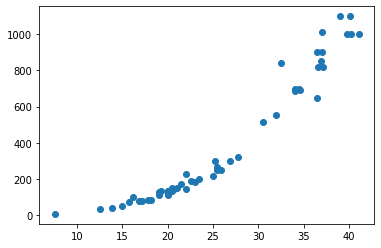

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)

# KNN Regression Analysis (회귀 분석)

In [ ]:
# 회귀 분석
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# 학습 데이터는 2차원 배열로 해야함
trd = trd.reshape(-1, 1)
tsd = tsd.reshape(-1, 1)

knr.n_neighbors = 3 # default 5
knr.fit(trd, trt)
knr.score(trd, trt), knr.score(tsd, tst) # 학습 데이터 평가, 테스트 데이터 평가
# 학습 데이터 평가지표가 높고, 테스트 데이터 평가지표가 낮으면 -> 특수한 데이터 상황에서만 적중률이 높다. => 과대적합(overfit)
# 학습 데이터 평가지표가 낮고, 테스트 데이터 평가지표가 높으면 -> 학습이 제대로 되지 않았기 때문에 올바른 예측을 할 수가 없다.
# 학습 데이터 평가지표가 낮고, 테스트 데이터 평가지표도 낮으면 -> 학습이 부족하다. => 과소적합(underfit)

t_d, t_t = trd[3], trt[3]
print(t_d, t_t)
knr.predict([t_d])


[17.2] 80.0


array([81.])

# 원리
- 최근접한 지점들의 값을 평균내어 산출한다.

[[ 4 14  2]]
281.6666666666667


array([281.66666667])

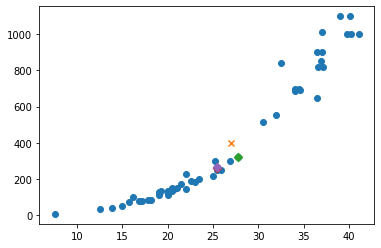

In [ ]:
# perch의 산점도
plt.scatter(perch_length, perch_weight)
plt.scatter(27, 400, marker='x') # 임의의 값 표기

dist, idx = knr.kneighbors([[27]]) # 임의값 무게에 인접한 지점들의 위치 반환

idx_1, idx_2, idx_3 = idx[0][0], idx[0][1], idx[0][2]
plt.scatter(trd[idx_1], trt[idx_1], marker='D')
plt.scatter(trd[idx_2], trt[idx_2], marker='D')
plt.scatter(trd[idx_3], trt[idx_3], marker='D')

print(idx)
print((trt[idx_1] + trt[idx_2] + trt[idx_3]) / 3) # 최근접한 지점들의 평균값

knr.predict([[27]]) # 모델이 평가 예측한 값

# 선형회귀

[  1.19934666 -24.75321792] 143.2843668420175


array([349.27119759])

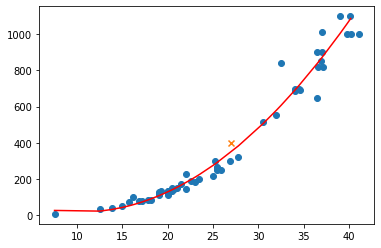

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(trd, trt)
lr.score(trd, trt), lr.score(tsd,tst)

# 특성이 많을 수록 정확도가 올라간다.
# 특성이 길이 하나면 길이를 제곱해서 새로운 특성을 만들어 낼 수 있다.

trd_sqr = trd ** 2
tsd_sqr = tsd ** 2

trd2 = np.concatenate((trd_sqr, trd), axis=1)
tsd2 = np.concatenate((tsd_sqr, tsd), axis=1)

lr.fit(trd2, trt)
lr.score(trd2, trt), lr.score(tsd2, tst)
lr.predict([[16.8 ** 2, 16.8]])

lr.coef_ # 기울기
lr.intercept_ # 절편
print(lr.coef_, lr.intercept_)

# 그래프 표시
plt.scatter(perch_length, perch_weight)
x = np.squeeze(trd, axis=1)
x = np.sort(x)

# 기울기와 절편 대입으로 모형 예측
plt.plot(x, 1.2*(x**2) - 24.75*x + 143.28, c='r')

# 임의의 값에 대한 예측
plt.scatter(27, 400, marker='x')
lr.predict([[27**2, 27]])